###  Vaibhav Kumar 
### Roll no : 19


# SVM Bank dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC



In [2]:
bank=pd.read_csv('D:\\vk\\TRIM 3\\ML\\DATASET\\bank.csv',sep=';')

In [3]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
bank.shape

(4521, 17)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


<AxesSubplot:>

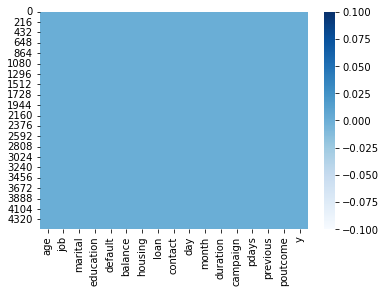

In [8]:
sns.heatmap(bank.isnull(),cmap='Blues')

In [9]:
#to find corelattion 
cor=bank.corr()

<AxesSubplot:>

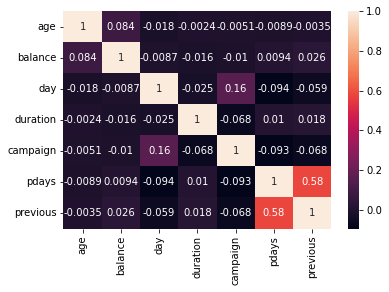

In [10]:
sns.heatmap(cor,annot=True)

**pdays and previous are highly corelated with value 0.58**


**day and campaign are also corelated with 0.16**



Numeric : age,balance,day,duration,campaign,pdays




categorical:



Oridinal:poutcome,default,housing,loan (using map)




nominal : job,marital,education ,contact,month (get dummies)


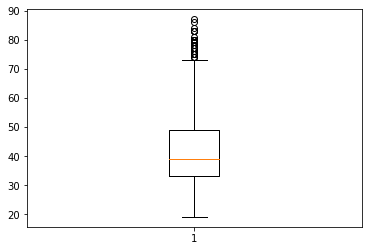

In [11]:
plt.boxplot(bank['age']);

**min age is 20 and max age is 70-90**

In [12]:
bank['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

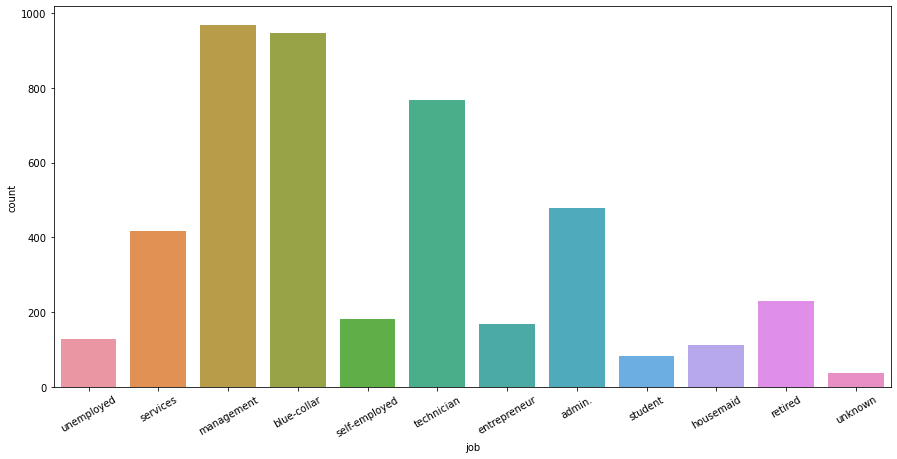

In [13]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x='job',data=bank)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

**most of the customers are from managment,blue collar and technician**


**less from hosemain, students ,unknown and unemployed**

In [14]:
bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

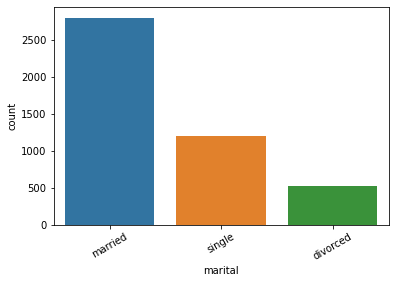

In [15]:
ax=sns.countplot(x='marital',data=bank)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

**most are married**

In [16]:
bank['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

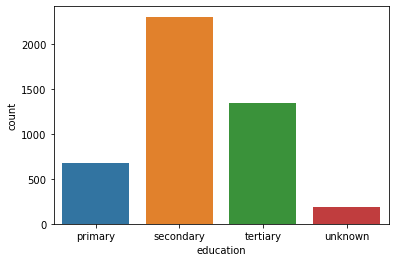

In [17]:
ax=sns.countplot(x='education',data=bank)


**most of them are educated secondary and teriary**

In [18]:
bank['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

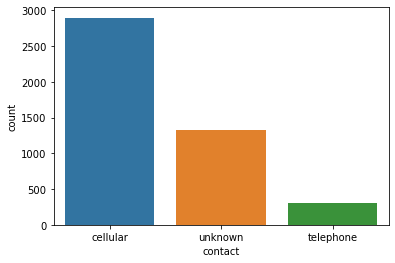

In [19]:
ax=sns.countplot(x='contact',data=bank)

**most contact are made on cellular network and less on telephone**

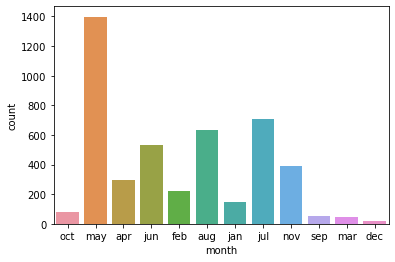

In [20]:
ax=sns.countplot(x='month',data=bank)

**may month has most count and december has less count**

In [21]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

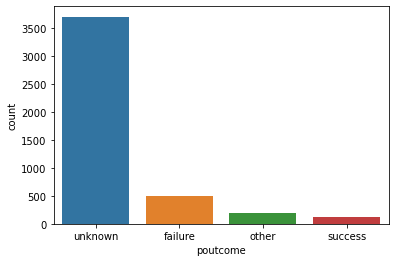

In [22]:
ax=sns.countplot(x='poutcome',data=bank)

**most of they are unknown**

In [23]:
bank['poutcome']=bank['poutcome'].map({'failure':-1,'unknown':0,'success':1,'other':0})

In [24]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
bank['housing'].unique()

array(['no', 'yes'], dtype=object)

In [26]:
bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [27]:
bank['default']=bank['default'].map({'yes':0,'no':1})
bank['housing']=bank['housing'].map({'yes':0,'no':1})
bank['loan']=bank['loan'].map({'yes':0,'no':1})

In [28]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1,1787,1,1,cellular,19,oct,79,1,-1,0,0,no
1,33,services,married,secondary,1,4789,0,0,cellular,11,may,220,1,339,4,-1,no
2,35,management,single,tertiary,1,1350,0,1,cellular,16,apr,185,1,330,1,-1,no
3,30,management,married,tertiary,1,1476,0,0,unknown,3,jun,199,4,-1,0,0,no
4,59,blue-collar,married,secondary,1,0,0,1,unknown,5,may,226,1,-1,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,1,-333,0,1,cellular,30,jul,329,5,-1,0,0,no
4517,57,self-employed,married,tertiary,0,-3313,0,0,unknown,9,may,153,1,-1,0,0,no
4518,57,technician,married,secondary,1,295,1,1,cellular,19,aug,151,11,-1,0,0,no
4519,28,blue-collar,married,secondary,1,1137,1,1,cellular,6,feb,129,4,211,3,0,no


In [29]:
nominal=['job','marital','education','contact','month']
data=pd.get_dummies(bank,columns=nominal)

In [30]:
data.shape

(4521, 46)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  4521 non-null   int64 
 1   default              4521 non-null   int64 
 2   balance              4521 non-null   int64 
 3   housing              4521 non-null   int64 
 4   loan                 4521 non-null   int64 
 5   day                  4521 non-null   int64 
 6   duration             4521 non-null   int64 
 7   campaign             4521 non-null   int64 
 8   pdays                4521 non-null   int64 
 9   previous             4521 non-null   int64 
 10  poutcome             4521 non-null   int64 
 11  y                    4521 non-null   object
 12  job_admin.           4521 non-null   uint8 
 13  job_blue-collar      4521 non-null   uint8 
 14  job_entrepreneur     4521 non-null   uint8 
 15  job_housemaid        4521 non-null   uint8 
 16  job_ma

In [32]:
data['y']=data['y'].map({'yes':1,'no':0})

In [33]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,1,1787,1,1,19,79,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
1,33,1,4789,0,0,11,220,1,339,4,...,0,0,0,0,0,0,1,0,0,0
2,35,1,1350,0,1,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0
3,30,1,1476,0,0,3,199,4,-1,0,...,0,0,0,0,1,0,0,0,0,0
4,59,1,0,0,1,5,226,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
data[['age','balance','day','campaign','pdays']]=StandardScaler().fit_transform(data[['age','balance','day','campaign','pdays']])

In [35]:
data.shape

(4521, 46)

In [36]:
data.drop('duration',axis=1,inplace=True)

In [37]:
data.shape

(4521, 45)

In [38]:
op=data.pop('y')

In [39]:
op.shape

(4521,)

In [40]:
xtr,xts,ytr,yts=train_test_split(data,op,train_size=0.8,random_state=100)

In [41]:
xtr.shape

(3616, 44)

In [42]:
ytr.shape

(3616,)

In [43]:
yts.shape

(905,)

In [44]:
xts.shape

(905, 44)